In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
image_size = (32,32)
batch_size = 32
train_flow_path= './images/training_set'
test_flow_path = './images/test_set'

In [3]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_flow = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size=image_size,
    batch_size=batch_size,
    color_mode='rgb',
    classes=['Э','Ю','Я'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

test_flow = data_gen_test.flow_from_directory(
    test_flow_path,
#    train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode='rgb',
    classes=['Э','Ю','Я'],
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 708 images belonging to 3 classes.
Found 282 images belonging to 3 classes.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten

In [5]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9219      
Total params: 9,219
Trainable params: 9,219
Non-trainable params: 0
_________________________________________________________________


In [6]:
model_hist = model.fit_generator(train_flow, epochs=100, validation_data=test_flow)

Epoch 1/100
 1/23 [>.............................] - ETA: 4s - loss: 220.0552 - accuracy: 0.4062

/home/chappybunny/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/chappybunny/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


23/23 [==============================] - 1s 35ms/step - loss: 264.2353 - accuracy: 0.3983 - val_loss: 171.0243 - val_accuracy: 0.2518
Epoch 2/100
23/23 [==============================] - 1s 34ms/step - loss: 125.9645 - accuracy: 0.3630 - val_loss: 98.7447 - val_accuracy: 0.4007
Epoch 3/100
23/23 [==============================] - 1s 33ms/step - loss: 64.4937 - accuracy: 0.3460 - val_loss: 79.1275 - val_accuracy: 0.3369
Epoch 4/100
23/23 [==============================] - 1s 35ms/step - loss: 39.1079 - accuracy: 0.4040 - val_loss: 43.1457 - val_accuracy: 0.3901
Epoch 5/100
23/23 [==============================] - 1s 39ms/step - loss: 72.2815 - accuracy: 0.3475 - val_loss: 34.7930 - val_accuracy: 0.4326
Epoch 6/100
23/23 [==============================] - 1s 40ms/step - loss: 72.2215 - accuracy: 0.3192 - val_loss: 32.1701 - val_accuracy: 0.4362
Epoch 7/100
23/23 [==============================] - 1s 47ms/step - loss: 56.3976 - accuracy: 0.3757 - val_loss: 57.0433 - val_accuracy: 0.4007
E

23/23 [==============================] - 1s 45ms/step - loss: 83.4292 - accuracy: 0.4703 - val_loss: 75.6315 - val_accuracy: 0.5284
Epoch 58/100
23/23 [==============================] - 1s 45ms/step - loss: 58.1326 - accuracy: 0.4774 - val_loss: 13.4359 - val_accuracy: 0.6028
Epoch 59/100
23/23 [==============================] - 1s 43ms/step - loss: 51.0380 - accuracy: 0.4675 - val_loss: 36.1496 - val_accuracy: 0.4539
Epoch 60/100
23/23 [==============================] - 1s 47ms/step - loss: 53.5454 - accuracy: 0.5198 - val_loss: 98.5463 - val_accuracy: 0.4184
Epoch 61/100
23/23 [==============================] - 1s 44ms/step - loss: 54.1285 - accuracy: 0.4732 - val_loss: 8.1025 - val_accuracy: 0.7234
Epoch 62/100
23/23 [==============================] - 1s 46ms/step - loss: 67.0909 - accuracy: 0.4322 - val_loss: 65.0015 - val_accuracy: 0.4433
Epoch 63/100
23/23 [==============================] - 1s 46ms/step - loss: 58.2720 - accuracy: 0.4901 - val_loss: 59.5067 - val_accuracy: 0.3546

In [7]:
def plot_history(history, scores,figsize=(12,6), path_saving='./images/report/', name='SimpleNetworkScores.png'):
    n = len(scores)
    fig,axs = plt.subplots(nrows=1,ncols=n,figsize=figsize)
    for i,score in enumerate(scores):
        axs[i].plot(history.history[score])
        axs[i].plot(history.history[f'val_{score}'])
        axs[i].set_title(f'Model {score}')
        axs[i].set_ylabel(f'{score}')
        axs[i].set_xlabel(f'epoch')
        axs[i].legend(['Train', 'Test'], loc='upper left')
    
    fig.savefig(path_saving+name)

In [8]:
from keras.utils import plot_model

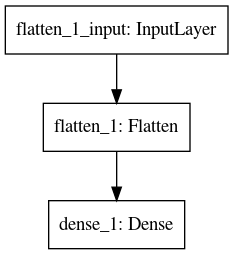

In [9]:
plot_model(model,'./images/report/SimpleNetworkStructure.png')

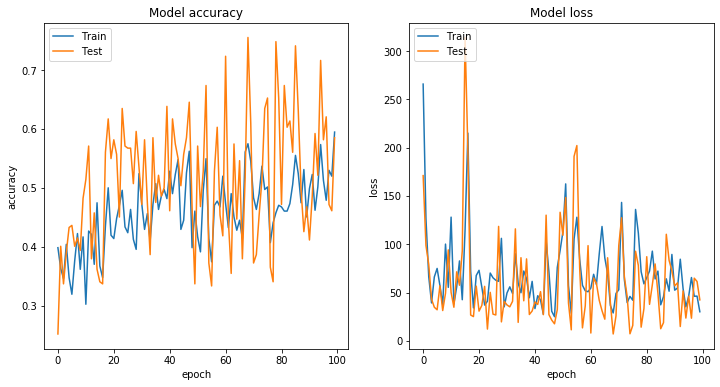

In [10]:
plot_history(model_hist,['accuracy','loss'])